# 数量化理論
数量化理論は分析する説明変数が質的データの中で名義尺度(意味のない数値やカテゴリ)の場合に行うモデルの作成方法

# ライブラリのインポート

In [ ]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import FactorAnalysis as FA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データの読み込み

In [ ]:
df = pd.read_csv("golf.csv",encoding="shift-jis")
df

,天気,気温,湿度,風,ゴルフ
0,晴,29,85,弱,しない
1,晴,27,90,強,しない
2,曇,28,78,弱,する
3,雨,21,96,弱,する
4,雨,20,80,弱,する
5,雨,18,70,強,しない
6,曇,18,65,強,する
7,晴,22,95,弱,しない
8,晴,21,70,弱,する
9,雨,24,80,弱,する


# 数量化理論Ⅰ類
一般にⅠ類では重回帰分析を行う

In [ ]:
df_dum = pd.get_dummies(df,columns=["天気", "風", "ゴルフ"])
df_dum

,気温,湿度,天気_晴,天気_曇,天気_雨,風_弱,風_強,ゴルフ_しない,ゴルフ_する
0,29,85,1,0,0,1,0,1,0
1,27,90,1,0,0,0,1,1,0
2,28,78,0,1,0,1,0,0,1
3,21,96,0,0,1,1,0,0,1
4,20,80,0,0,1,1,0,0,1
5,18,70,0,0,1,0,1,1,0
6,18,65,0,1,0,0,1,0,1
7,22,95,1,0,0,1,0,1,0
8,21,70,1,0,0,1,0,0,1
9,24,80,0,0,1,1,0,0,1


In [ ]:
y = df_dum["気温"].values
dfx = df_dum[["天気_晴", "天気_曇", "天気_雨", "風_強", "ゴルフ_する"]]
x = dfx.values

In [ ]:
model=LR()
model.fit(x, y)

LinearRegression()

In [ ]:
coef_ = list(model.coef_)
coef_.append(model.intercept_)
col = list(dfx.columns)
col.append("intercept")
y_pred = model.predict(x)
sse = np.sum((y - y_pred) ** 2, axis = 0) / (x.shape[0] - x.shape[1] - 1)
s = np.linalg.inv(np.dot(x.T, x))
std_err = np.sqrt(np.diagonal(sse * s))
t = list(model.coef_ / std_err)
t.append(np.nan)
out = []
out.append(coef_)
out.append(t)
dfo = pd.DataFrame(out)
dfo.columns = col
dfo.index=[["回帰係数", "t値"]]
dfo

,天気_晴,天気_曇,天気_雨,風_強,ゴルフ_する,intercept
回帰係数,0.821695,1.532588,-2.354283,-2.888268,-2.120112,25.781657
t値,0.374222,0.438507,-0.935563,-1.390009,-0.857245,NaN


# 数量化理論Ⅱ類
Ⅱ類は一般に判別分析を用いる。技術書によってはロジスティック回帰を用いることもある。

In [ ]:
y = df_dum["ゴルフ_する"].values
dfx = df_dum[["天気_晴","天気_曇","天気_雨","風_強"]]
x = dfx.values

In [ ]:
model = LDA()
model.fit(x, y)

LinearDiscriminantAnalysis()

In [ ]:
coef_ = model.coef_
coef_ = np.append(coef_, model.intercept_)
coef_ = np.array(coef_).flatten()
dfo = pd.DataFrame(coef_)
col = list(dfx.columns)
col.append("intercept")
dfo.index = col
dfo = dfo.T
dfo.index = ["判別係数"]
dfo

,天気_晴,天気_曇,天気_雨,風_強,intercept
判別係数,-1.420573,2.166019,-0.280908,-1.675978,1.575585


# 数量化理論Ⅲ類
Ⅲ類は一般に因子分析を用いる。技術書によっては主成分分析を用いる。

In [ ]:
dfx = df_dum[["天気_晴", "天気_曇", "天気_雨", "風_強", "ゴルフ_する"]]
x = dfx.values

In [ ]:
model = FA(n_components=2)
model.fit(x)

FactorAnalysis(n_components=2)

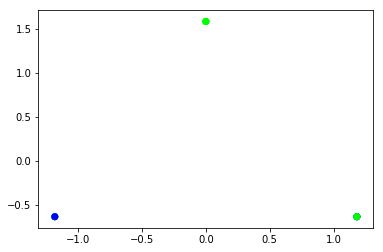

array([[ 1.18321596e+00, -6.32455532e-01],
       [ 1.18321596e+00, -6.32455532e-01],
       [-3.44928535e-12,  1.58113883e+00],
       [-1.18321596e+00, -6.32455532e-01],
       [-1.18321596e+00, -6.32455532e-01],
       [-1.18321596e+00, -6.32455532e-01],
       [-3.44928535e-12,  1.58113883e+00],
       [ 1.18321596e+00, -6.32455532e-01],
       [ 1.18321596e+00, -6.32455532e-01],
       [-1.18321596e+00, -6.32455532e-01],
       [ 1.18321596e+00, -6.32455532e-01],
       [-3.44928535e-12,  1.58113883e+00],
       [-3.44928535e-12,  1.58113883e+00],
       [-1.18321596e+00, -6.32455532e-01]])

In [ ]:
tx = model.transform(x)
plt.scatter(tx[:, 0], tx[:, 1], c=dfx["ゴルフ_する"], cmap="brg")
plt.show()
tx